In [1]:
from qiskit import QuantumCircuit, transpile, ClassicalRegister, QuantumRegister
from qiskit.quantum_info import state_fidelity
from qiskit_aer import AerSimulator, UnitarySimulator, StatevectorSimulator, QasmSimulator

import numpy as np
from math import pi 
import matplotlib.pyplot as plt

## Unitary Operations

#### Single Qubit Gates

U Gate

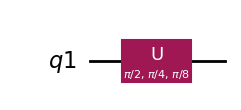

In [2]:
q = QuantumRegister(1)
qc = QuantumCircuit(q)

qc.u(pi/2, pi/4, pi/8, q)
qc.draw('mpl')

In [3]:
backend = UnitarySimulator()
qc_compiled = transpile(qc, backend)
job = backend.run(qc_compiled)
job.result().get_unitary(qc, decimals = 3)

Operator([[ 0.707+0.j   , -0.653-0.271j],
          [ 0.5  +0.5j  ,  0.271+0.653j]],
         input_dims=(2,), output_dims=(2,))


P Gate

In [4]:
qc = QuantumCircuit(q)
qc.p(pi / 2, q)
qc.draw('mpl')

qc_transpile = transpile(qc, backend)
backend.run(qc_transpile).result().get_unitary(qc, decimals = 3)

Operator([[1.+0.j, 0.+0.j],
          [0.+0.j, 0.+1.j]],
         input_dims=(2,), output_dims=(2,))


Identity Gate

In [5]:
qc = QuantumCircuit(q)
qc.id(q)

job = backend.run(transpile(qc, backend))
job.result().get_unitary(qc, decimals = 3)

Operator([[1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j]],
         input_dims=(2,), output_dims=(2,))


#### Multi-Qubit Gates

Controlled-Pauli Gates

CX

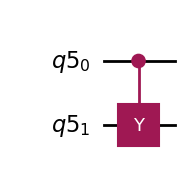

In [6]:
q = QuantumRegister(2) 
qc = QuantumCircuit(q)

qc.cy(q[0], q[1])
qc.draw('mpl')

Controlled Rotation around $z$-axis

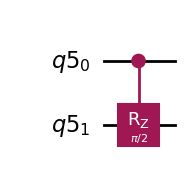

In [7]:
qc = QuantumCircuit(q)
qc.crz(pi/2, q[0], q[1])
qc.draw('mpl')

In [8]:
job = backend.run(transpile(qc, backend))
job.result().get_unitary(qc, decimals = 3)

Operator([[1.   +0.j   , 0.   +0.j   , 0.   +0.j   , 0.   +0.j   ],
          [0.   +0.j   , 0.707-0.707j, 0.   +0.j   , 0.   +0.j   ],
          [0.   +0.j   , 0.   +0.j   , 1.   +0.j   , 0.   +0.j   ],
          [0.   +0.j   , 0.   +0.j   , 0.   +0.j   , 0.707+0.707j]],
         input_dims=(2, 2), output_dims=(2, 2))


Controlled Phase Rotation

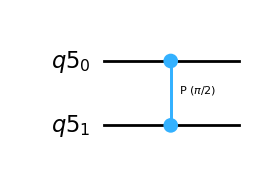

In [9]:
qc = QuantumCircuit(q)
qc.cp(pi/2, q[0], q[1])
qc.draw('mpl')

In [10]:
job = backend.run(transpile(qc, backend))
job.result().get_unitary(qc, decimals = 3)

Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+1.j]],
         input_dims=(2, 2), output_dims=(2, 2))


Controlled $u$-rotation

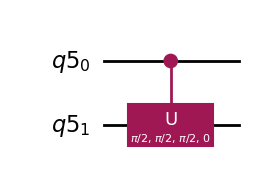

In [11]:
qc = QuantumCircuit(q)
qc.cu(pi/2, pi/2, pi/2, 0, q[0], q[1])
qc.draw('mpl')

In [12]:
job = backend.run(transpile(qc, backend))
job.result().get_unitary(qc, decimals = 3)

Operator([[ 1.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ,  0.   +0.j   ],
          [ 0.   +0.j   ,  0.707+0.j   ,  0.   +0.j   , -0.   -0.707j],
          [ 0.   +0.j   ,  0.   +0.j   ,  1.   +0.j   ,  0.   +0.j   ],
          [ 0.   +0.j   ,  0.   +0.707j,  0.   +0.j   , -0.707+0.j   ]],
         input_dims=(2, 2), output_dims=(2, 2))


SWAP gate

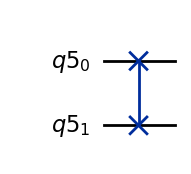

In [13]:
qc = QuantumCircuit(q)
qc.swap(q[0], q[1])
qc.draw('mpl')

In [14]:
job = backend.run(transpile(qc, backend))
job.result().get_unitary(qc, decimals = 3)

Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


#### Three-Qubit Gates

Toffoli ($ccx$ gate)

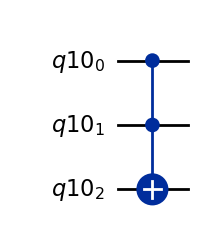

In [15]:
q = QuantumRegister(3) 

qc = QuantumCircuit(q)
qc.ccx(q[0], q[1], q[2])
qc.draw('mpl')

In [16]:
job = backend.run(transpile(qc, backend))
job.result().get_unitary(qc, decimals = 3)

Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2, 2), output_dims=(2, 2, 2))


Controlled SWAP (Fredkin)

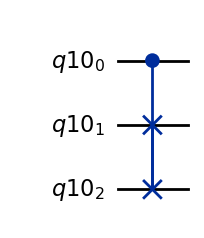

In [17]:
qc = QuantumCircuit(q)
qc.cswap(q[0], q[1], q[2])
qc.draw('mpl')

In [18]:
job = backend.run(transpile(qc, backend))
job.result().get_unitary(qc, decimals = 3)

Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j]],
         input_dims=(2, 2, 2), output_dims=(2, 2, 2))


## Non-Unitary Operations

In [19]:
q = QuantumRegister(1)
c = ClassicalRegister(1)

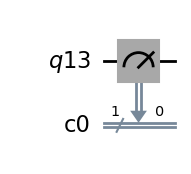

In [20]:
qc = QuantumCircuit(q, c)
qc.measure(q, c)
qc.draw('mpl')

In [21]:
backend = QasmSimulator()
job = backend.run(transpile(qc, backend))
job.result().get_counts(qc)

{'0': 1024}

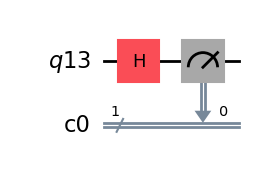

In [38]:
qc = QuantumCircuit(q, c)
qc.h(q)
qc.measure(q, c)
qc.draw('mpl')

In [40]:
backend = QasmSimulator()
job = backend.run(transpile(qc, backend), shots = 100)
result = job.result().get_counts(qc)
print(result)



{'1': 48, '0': 52}


Reset

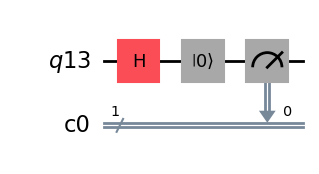

In [42]:
qc = QuantumCircuit(q, c)
qc.h(q[0])
qc.reset(q[0])
qc.measure(q, c)
qc.draw('mpl')

In [46]:
backend = AerSimulator()
job = backend.run(transpile(qc, backend), shots = 100)
job.result().get_counts(qc)

{'0': 100}

Conditional Operations

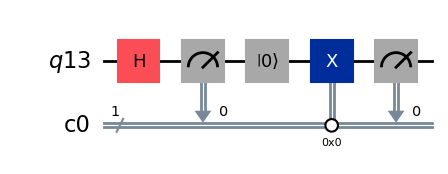

In [63]:
qc = QuantumCircuit(q, c)
qc.h(q)
qc.measure(q, c)
qc.reset(q)
qc.x(q).c_if(c, 0)
qc.measure(q, c)
qc.draw('mpl')

In [64]:
job = backend.run(transpile(qc, backend))
job.result().get_counts(qc)

{'0': 515, '1': 509}

Arbitrary Intialization

Initializing a quantum circuit to the following vector:

$$ |\psi \rangle = \frac{i}{4}|000\rangle + \frac{1}{\sqrt{8}}|001\rangle + \frac{1+i}{4}|010\rangle + \frac{1+2i}{\sqrt{8}}|101\rangle + \frac{1}{4}|110\rangle $$

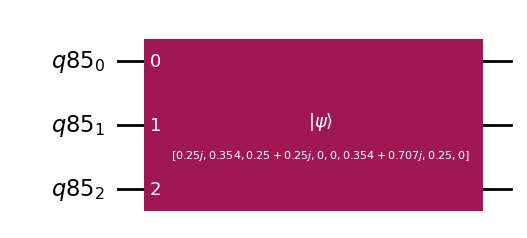

In [68]:
import math 

desired_vector = [ 
    1 / 4 * complex(0, 1), 
    1 / math.sqrt(8) * complex(1, 0), 
    1 / 4 * complex(1, 1), 
    0, 
    0, 
    1 / math.sqrt(8) * complex(1, 2), 
    1 / 4 * complex(1, 0), 
    0
]

q = QuantumRegister(3)
qc = QuantumCircuit(q)

qc.initialize(desired_vector, [q[0], q[1], q[2]])
qc.draw('mpl')

In [71]:
backend = StatevectorSimulator() 
job = backend.run(transpile(qc, backend))
qc_state = job.result().get_statevector(qc)
qc_state

Statevector([0.        +0.25j      , 0.35355339+0.j        ,
             0.25      +0.25j      , 0.        +0.j        ,
             0.        +0.j        , 0.35355339+0.70710678j,
             0.25      +0.j        , 0.        +0.j        ],
            dims=(2, 2, 2))


In [74]:
state_fidelity(desired_vector, qc_state)

0.9999999999999998